### Importing Library

In [66]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(os.path.join("data","student.csv"))

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Independent and Dependent Variables

In [8]:
X = df.drop("math_score",axis=1)
y = df['math_score']

In [16]:
# Total Catogerical Features per Catogerical Columns
cato_columns = [column for column in X.columns if X[column].dtype=='O']
num_columns = [column for column in X.columns if X[column].dtype!='O']
for column in cato_columns:
    print(f"Total Number of Distinct Catogeries in column {column} : {df[column].nunique()} which are {df[column].unique()}")

Total Number of Distinct Catogeries in column gender : 2 which are ['female' 'male']
Total Number of Distinct Catogeries in column race_ethnicity : 5 which are ['group B' 'group C' 'group A' 'group D' 'group E']
Total Number of Distinct Catogeries in column parental_level_of_education : 6 which are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Total Number of Distinct Catogeries in column lunch : 2 which are ['standard' 'free/reduced']
Total Number of Distinct Catogeries in column test_preparation_course : 2 which are ['none' 'completed']


In [10]:
# As there less Number per Column, we can go ahead and create One-Hot Encoding for Each feature using pipeline.

### Feature Engineering

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [12]:
standardScalar = StandardScaler()
oneHotEncoder = OneHotEncoder()

In [17]:
processing_pipeline = ColumnTransformer(
    [
        ("StandardScalar",standardScalar,num_columns),
        ("OneHotEncoder", oneHotEncoder,cato_columns)
    ]
)

In [25]:
processing_pipeline

ColumnTransformer(transformers=[('StandardScalar', StandardScaler(),
                                 ['reading_score', 'writing_score']),
                                ('OneHotEncoder', OneHotEncoder(),
                                 ['gender', 'race_ethnicity',
                                  'parental_level_of_education', 'lunch',
                                  'test_preparation_course'])])

In [18]:
X = processing_pipeline.fit_transform(X)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size=0.2)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((800, 19), (800,), (200, 19), (200,))

### Defining Evaluvator

In [22]:
def get_metrics(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_true, y_pred)
    return MAE, MSE, RMSE, R2

### Defining Model Gardern

In [60]:
models = {
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Linear":LinearRegression(),
    "KNN Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "GradientBoost Regressor":GradientBoostingRegressor(verbose=0),
    "CatBoost Regressor":CatBoostRegressor(verbose=0),
    "XGBoost Regresssor":XGBRegressor()
}

model_list = []
r2_list = []

In [61]:
for Model in models.items():
    print("Model Name : ",Model[0])

    model = Model[1]
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    MAE,MSE,RMSE,R2 = get_metrics(y_test,y_pred)

    print("Mean Absolute Error :",MAE)
    print("Mean Square Error :",MSE)
    print("Root Mean Square Error :",RMSE)
    print("R2 Square :",R2)

    r2_list.append(R2)
    model_list.append(Model[0])
    
    print("----------------------------\n")

Model Name :  Lasso
Mean Absolute Error : 5.157879138921816
Mean Square Error : 42.50633235127344
Root Mean Square Error : 6.519688056285626
R2 Square : 0.825320079562973
----------------------------

Model Name :  Ridge
Mean Absolute Error : 4.211100688014259
Mean Square Error : 29.05627219234827
Root Mean Square Error : 5.3903870169356365
R2 Square : 0.880593148502874
----------------------------

Model Name :  Linear
Mean Absolute Error : 4.214763142474852
Mean Square Error : 29.095169866715494
Root Mean Square Error : 5.393993869732843
R2 Square : 0.8804332983749564
----------------------------

Model Name :  KNN Regressor
Mean Absolute Error : 5.619
Mean Square Error : 52.617
Root Mean Square Error : 7.253757646902741
R2 Square : 0.7837702557426202
----------------------------

Model Name :  Decision Tree Regressor
Mean Absolute Error : 6.455
Mean Square Error : 65.705
Root Mean Square Error : 8.10586207630009
R2 Square : 0.7299850742833848
----------------------------

Model Name

#### Plotting r2 Values

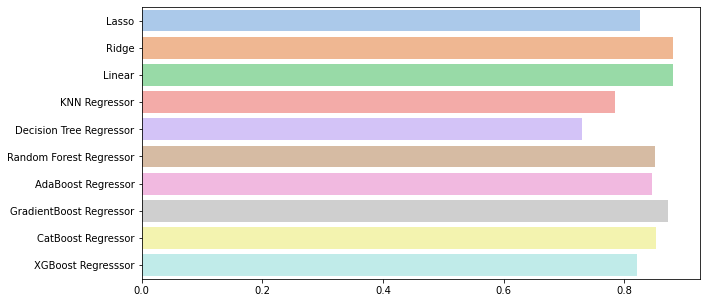

In [68]:
assert len(model_list)==len(r2_list)

plt.figure(figsize=(10,5))
sns.barplot(y = model_list,x=r2_list,palette='pastel')
plt.show()

### Model Training

In [69]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)
y_pred = xgbr.predict(X_test)

In [70]:
MAE,MSE,RMSE,R2 = get_metrics(y_test,y_pred)

print("Mean Absolute Error :",MAE)
print("Mean Square Error :",MSE)
print("Root Mean Square Error :",RMSE)
print("R2 Square :",R2)

Mean Absolute Error : 5.103629446029663
Mean Square Error : 43.50391987982302
Root Mean Square Error : 6.595750137764697
R2 Square : 0.8212204901494256


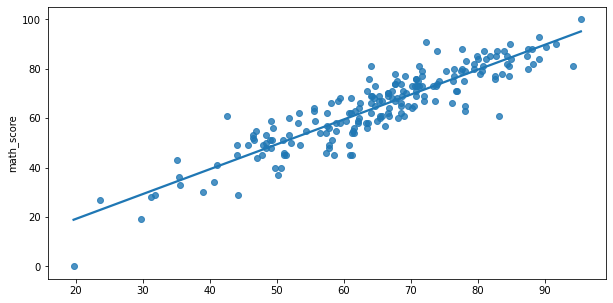

In [78]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_pred,y=y_test,ci=None)
plt.show()